In [1]:
!source ./bin/activate

In [10]:
# importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [3]:
data_uri = "https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv"

In [4]:
# retrive data
df = pd.read_csv(data_uri)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9593 non-null   object 
 1   latitude         9593 non-null   float64
 2   longitude        9593 non-null   float64
 3   depth            9593 non-null   float64
 4   mag              9592 non-null   float64
 5   magType          9592 non-null   object 
 6   nst              8018 non-null   float64
 7   gap              8018 non-null   float64
 8   dmin             8017 non-null   float64
 9   rms              9592 non-null   float64
 10  net              9593 non-null   object 
 11  id               9593 non-null   object 
 12  updated          9593 non-null   object 
 13  place            9593 non-null   object 
 14  type             9593 non-null   object 
 15  horizontalError  7317 non-null   float64
 16  depthError       9592 non-null   float64
 17  magError      

In [6]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-04-03T03:16:50.230Z,38.840668,-122.834335,1.32,0.53,md,6.0,122.0,0.002262,0.01,...,2025-04-03T03:18:28.928Z,"10 km NNW of The Geysers, CA",earthquake,0.61,1.23,0.310,9.0,automatic,nc,nc
1,2025-04-03T03:08:03.540Z,61.556800,-141.271600,13.40,1.20,ml,NaN,NaN,NaN,0.20,...,2025-04-03T03:10:11.692Z,"88 km E of McCarthy, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
2,2025-04-03T02:59:56.724Z,61.789200,-149.608200,38.70,1.20,ml,NaN,NaN,NaN,0.53,...,2025-04-03T03:01:20.110Z,"18 km N of Meadow Lakes, Alaska",earthquake,NaN,1.00,NaN,NaN,automatic,ak,ak
3,2025-04-03T02:54:35.248Z,60.081400,-152.528700,97.80,1.40,ml,NaN,NaN,NaN,0.46,...,2025-04-03T02:57:27.690Z,"46 km WNW of Happy Valley, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
4,2025-04-03T02:41:42.280Z,35.639833,-117.548500,8.08,0.89,ml,19.0,63.0,0.092800,0.13,...,2025-04-03T02:45:07.322Z,"12 km E of Ridgecrest, CA",earthquake,0.21,0.86,0.161,16.0,automatic,ci,ci


In [7]:
# choosing features and label data for regression purpose 
features = ['latitude','longitude','depth']
label = 'mag'

In [8]:
# data preprocessing 
df = df.dropna(subset=[label])

In [9]:
# doing in features 
for col in features:
    df[col] = df[col].fillna(df[col].median())

/tmp/ipykernel_85597/224668170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())
/tmp/ipykernel_85597/224668170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())
/tmp/ipykernel_85597/224668170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

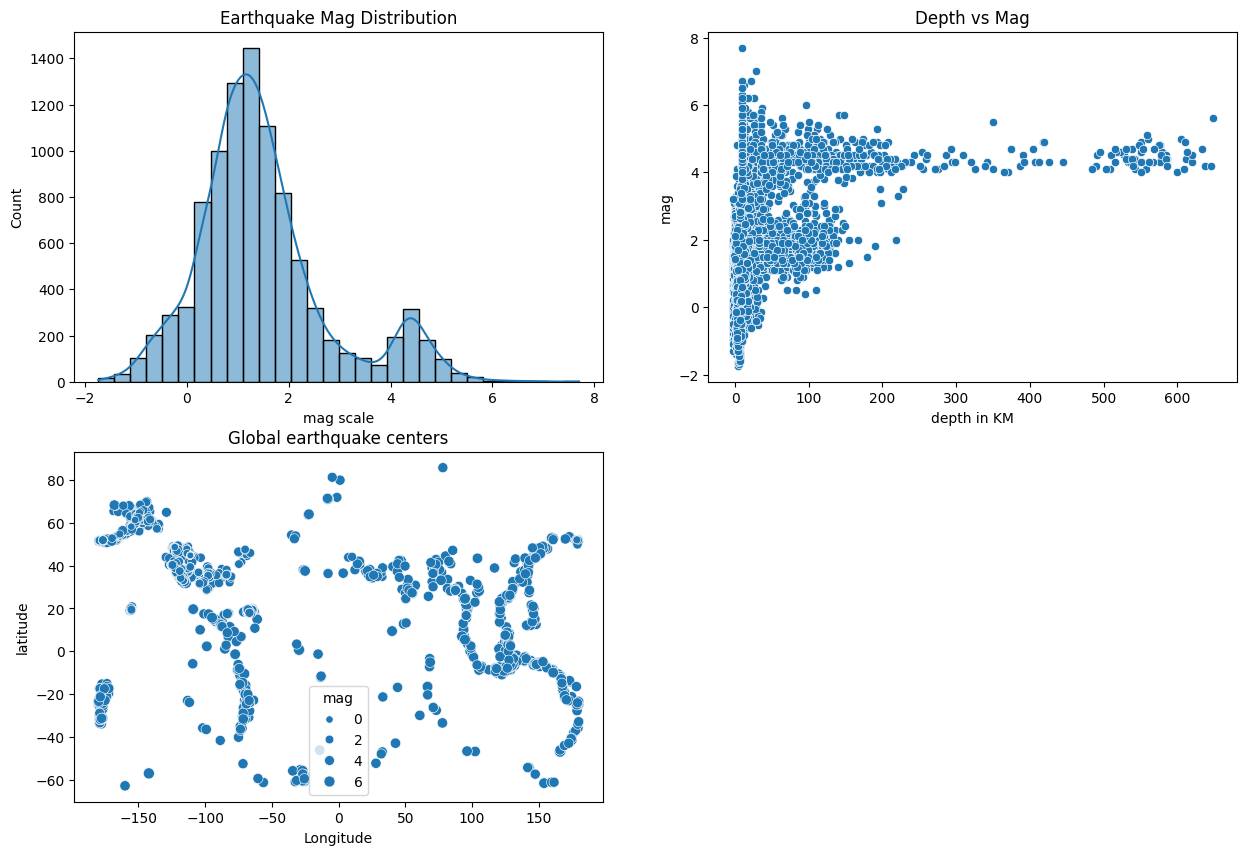

In [14]:
# some basic visuals for data analysis
plt.figure(figsize=(15,10))

# first plot   --subplots
plt.subplot(2,2,1)
plt.title("Earthquake Mag Distribution")
plt.xlabel("mag scale")
sb.histplot(df[label],kde=True,bins=30)
# second plot Depth vs Mag
plt.subplot(2,2,2)
plt.title("Depth vs Mag")
plt.xlabel("depth in KM")
sb.scatterplot(x='depth',y=label,data=df)

# Globe locations 
plt.subplot(2,2,3)
plt.title("Global earthquake centers")
plt.xlabel("Longitude")
plt.ylabel('latitude')
sb.scatterplot(x='longitude',y='latitude',size=label,data=df)

plt.show()